In [24]:
import numpy as np
import pandas as pd
xl = pd.ExcelFile("planilha completa 483 casos 1305 (1).xlsx")
#energy= pd.read_excel('Energy Indicators.xls', skiprows= skipr, usecols= "C:F", skipfooter= 38, na_values= "...")
sheets = xl.sheet_names
print(sheets)
df = pd.DataFrame(xl.parse(sheets[0], header=1, na_values="-"))
#print(df)
#df.replace(np.NaN, 0)
df.shape
#df.dtypes

['VARIÁVEIS', 'DESEMPENHO', 'QUADRO EXPLICATIVO', 'EXPLICAÇÃO COMPOSIÇÃO DA MASSA']


(483, 49)

In [38]:
dfn = df.convert_dtypes()
dfn.dtypes
compression_opts = dict(method='zip', archive_name='out.csv')
dfn.to_csv('out.zip', index=True, compression=compression_opts)

In [35]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Nº,POP,TAM.ATV,GR_POD,GR_SEGR,GR_C.ÉT,CIE_REL,GI_P.INV,GI_COMITÊ,GI_CONS,...,PS_OUV,PS_GEST,LI_DIR.CERT,LI_P.EST.,R.FIN,IND.SF,R.INV,VAR.INV,R.AT,IND.COB
count,483.00,456.00,459.00,483.00,482.00,480.00,483.00,483.00,483.00,471.00,...,479.00,482.00,483.00,482.00,453.00,454.00,460.00,459.00,413.00,413.00
mean,242.00,"141,151.59","279,573,311.64",1.00,0.83,0.30,0.35,0.92,0.85,0.63,...,0.84,0.22,0.78,0.29,"-163,181,126.20",1.81,"37,604,066.64",0.32,"-4,921,375,351.64",0.33
std,139.57,"302,852.90","725,646,343.18",0.00,0.38,0.46,0.48,0.27,0.35,0.48,...,0.37,0.41,0.42,0.46,"1,227,011,676.34",2.02,"158,581,891.96",1.15,"28,045,791,369.14",0.25
min,1.00,"1,160.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,"-17,014,917,961.47",-0.00,"-2,151,664,668.80",-1.00,"-347,090,844,269.31",-0.09
25%,121.50,"16,944.25","18,593,680.32",1.00,1.00,0.00,0.00,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,"-2,666,727.30",0.80,"2,230,268.38",0.12,"-586,788,614.29",0.13
50%,242.00,"40,056.00","55,063,371.15",1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,1.00,0.00,1.00,0.00,"1,544,334.33",1.25,"7,858,158.70",0.18,"-139,066,840.81",0.30
75%,362.50,"125,251.25","204,031,187.89",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,1.00,1.00,"11,258,936.50",2.19,"31,813,110.21",0.25,"-48,998,953.69",0.49
max,483.00,"2,886,698.00","5,911,148,873.21",1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,"875,482,695.86",29.70,"1,220,762,394.56",13.63,"38,495,499.24",1.08


In [29]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Shape of your Data Set: (483, 50)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  18
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  18
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  1
    50 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
8 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 36


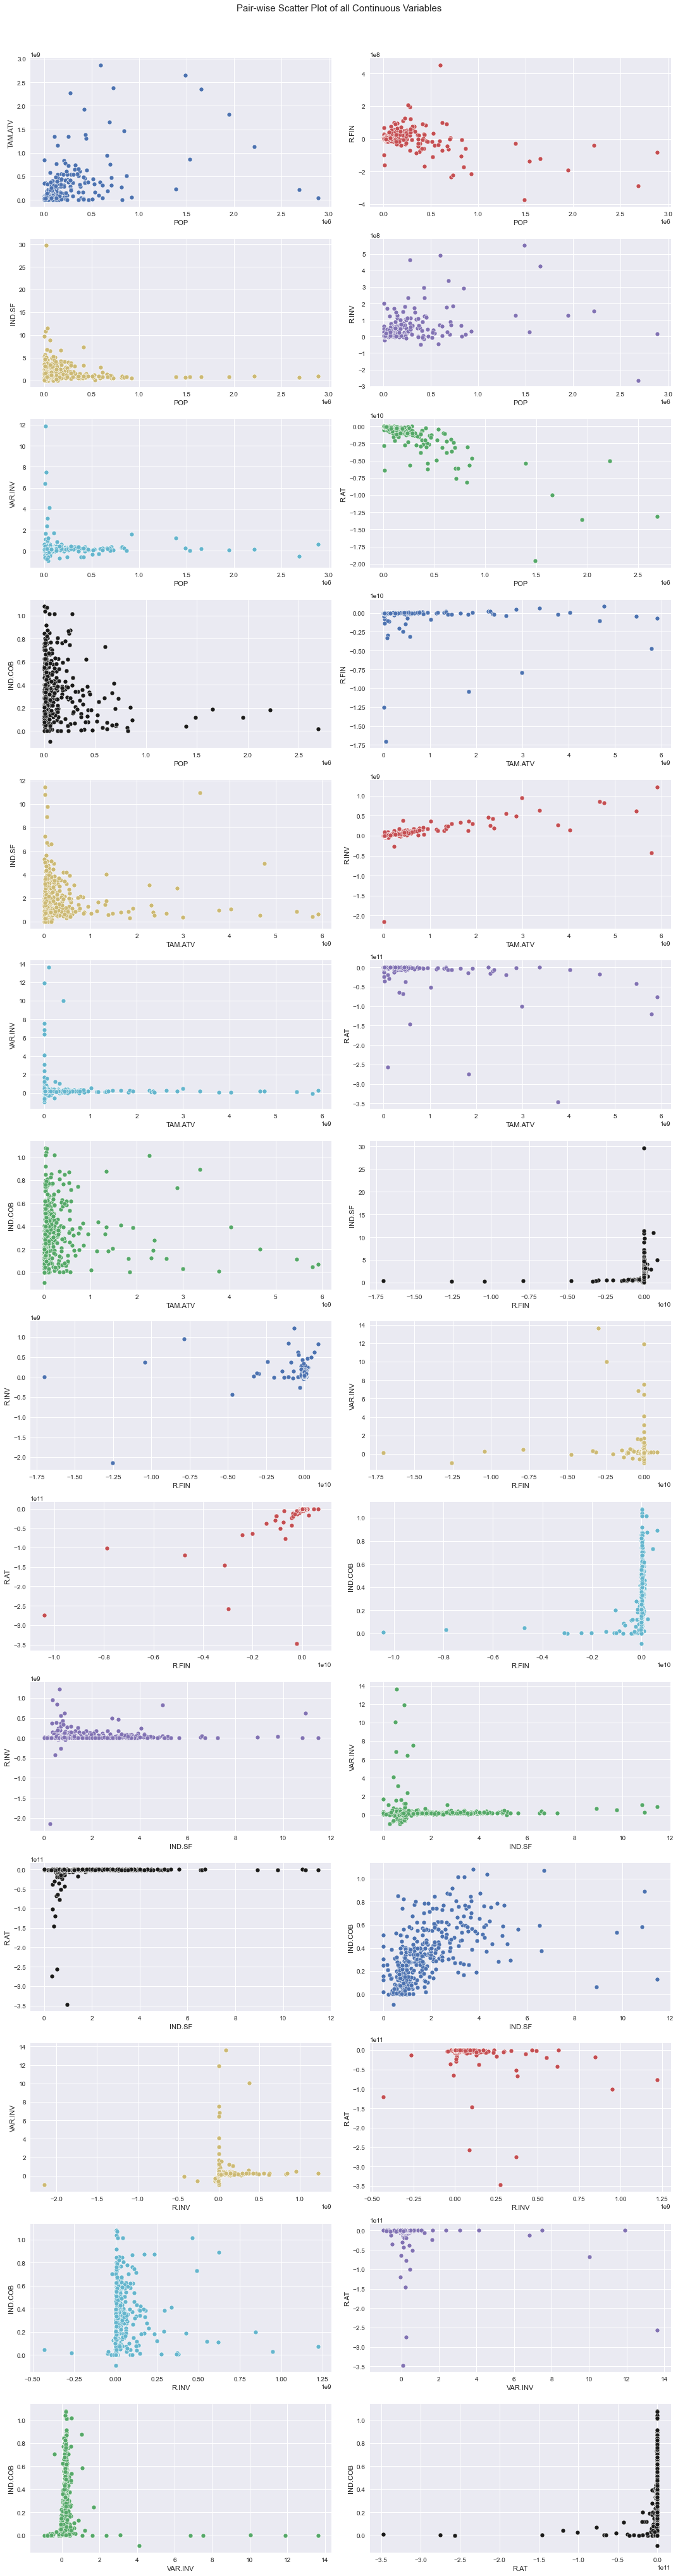

Could not draw Distribution Plot


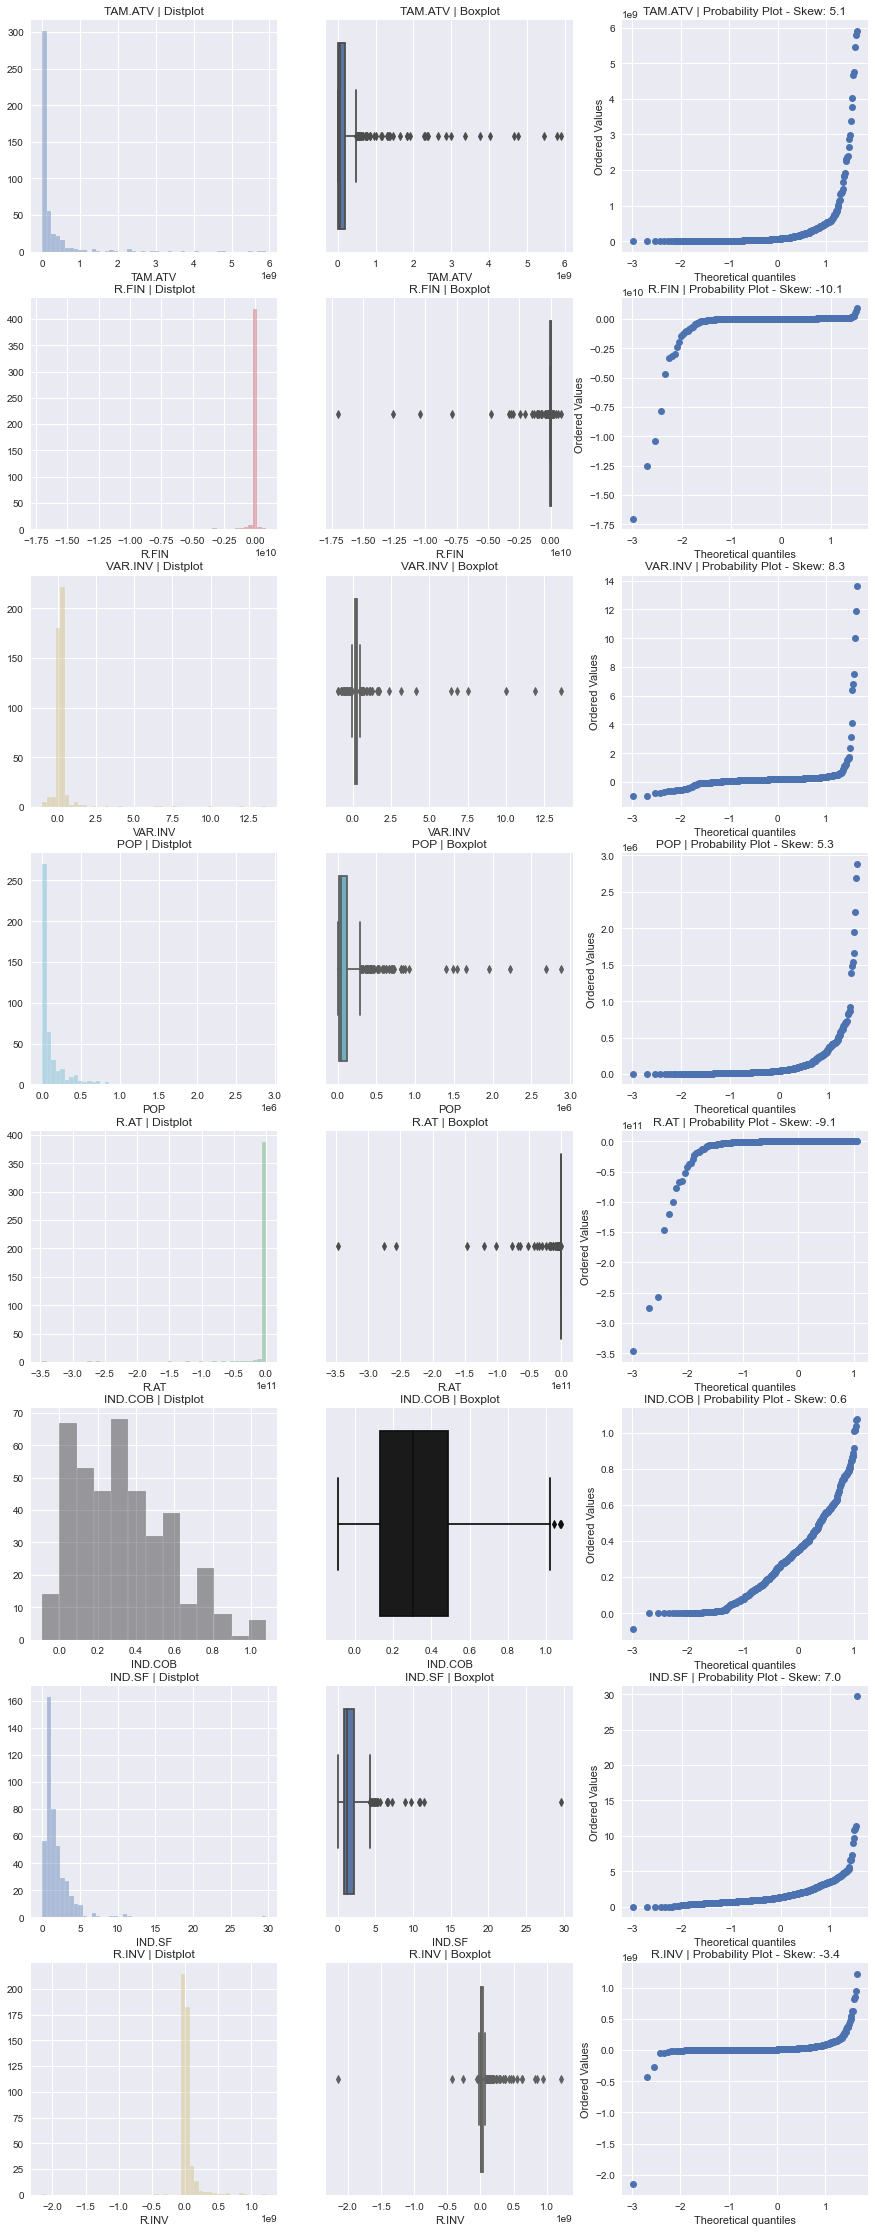

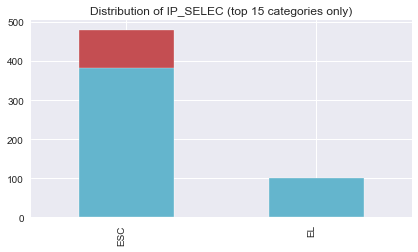

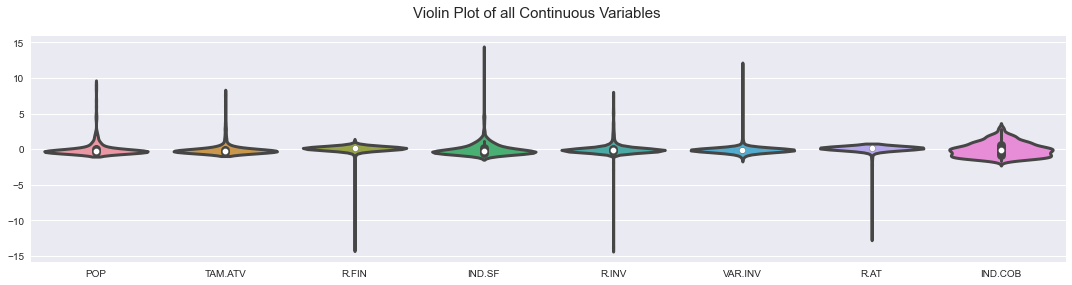

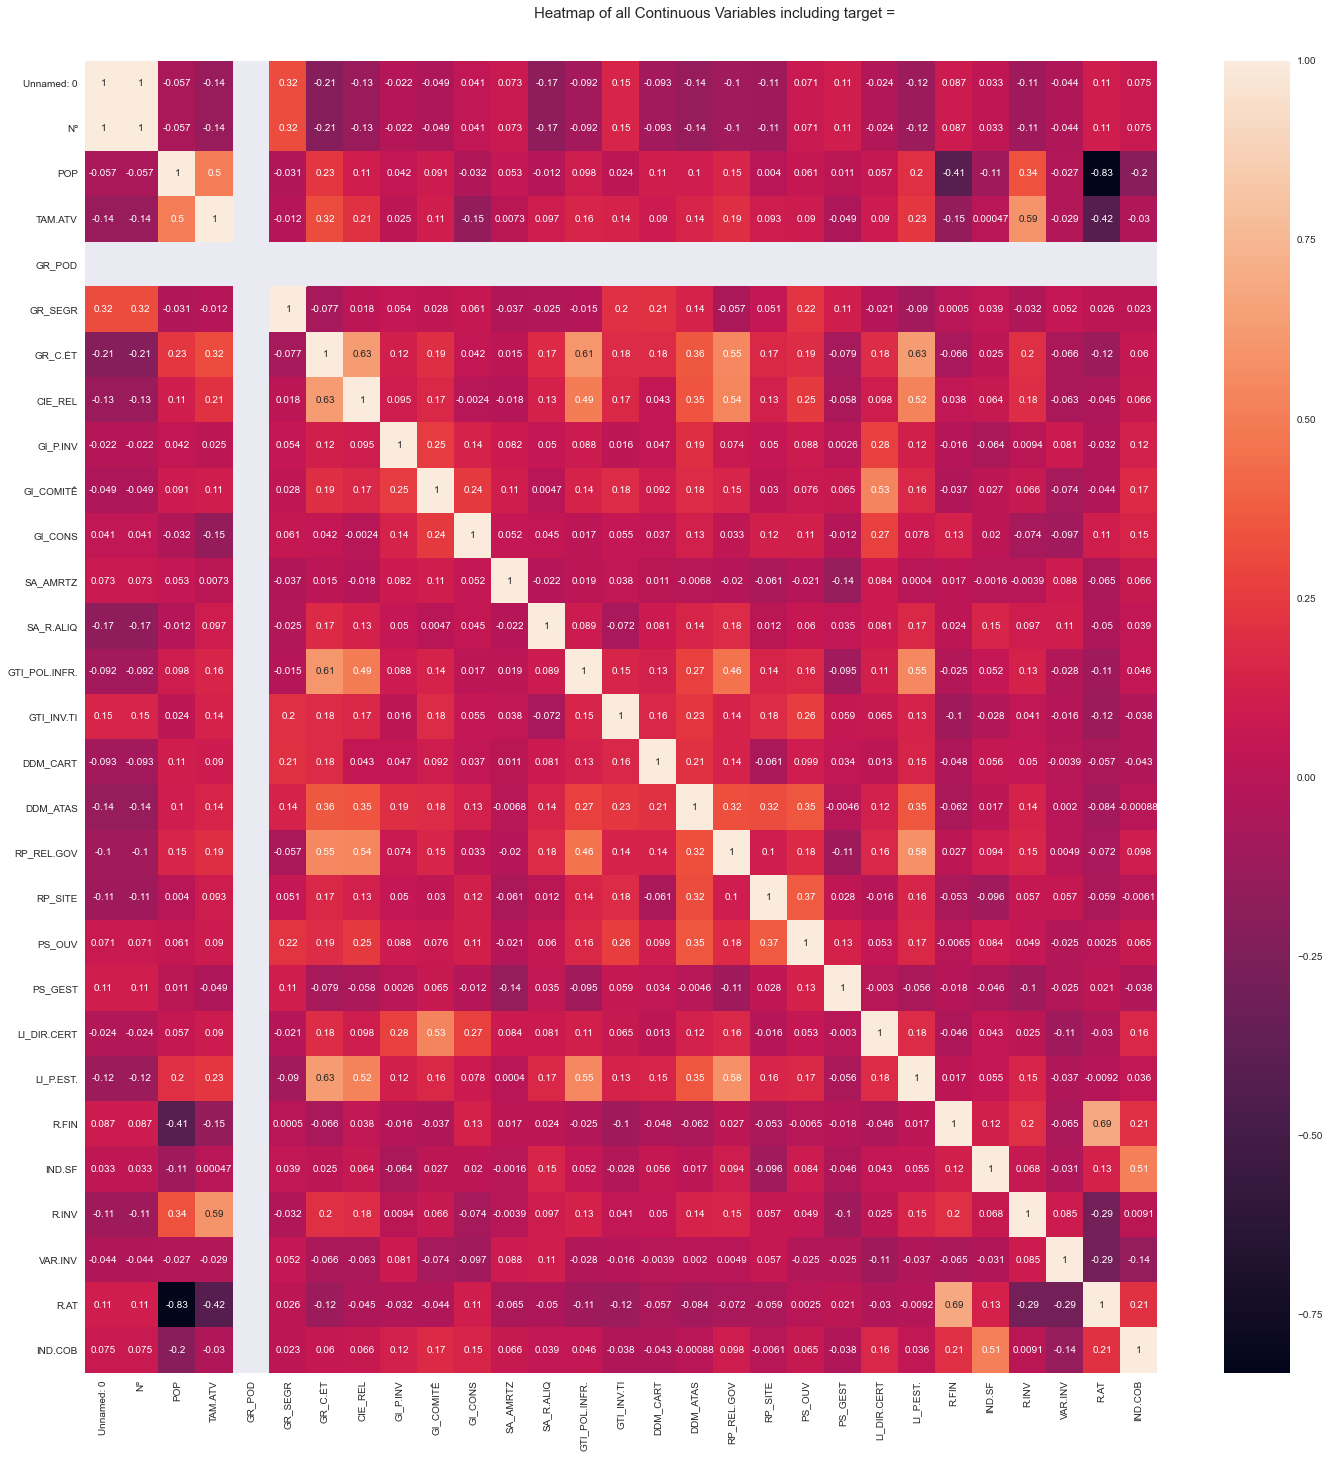

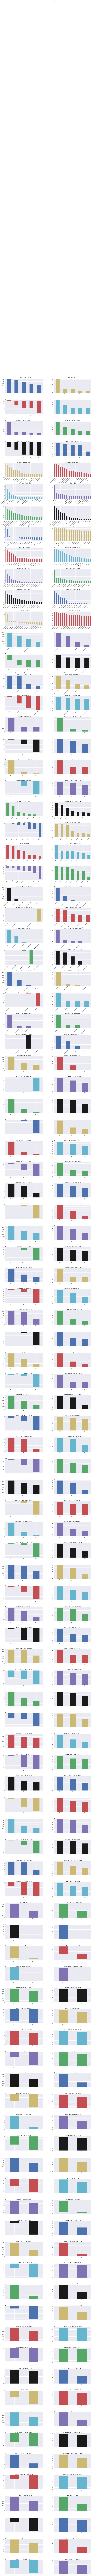

Time to run AutoViz (in seconds) = 99.874

 ###################### VISUALIZATION Completed ########################


In [39]:
sep = ","
dft = AV.AutoViz(
    filename="out.csv",
    sep=sep,
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [34]:
dft.shape

(483, 49)

array([[<AxesSubplot:title={'center':'R.FIN'}>]], dtype=object)

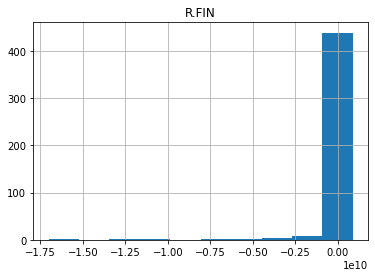

In [10]:
dfn.hist('R.FIN')#, by='UF')

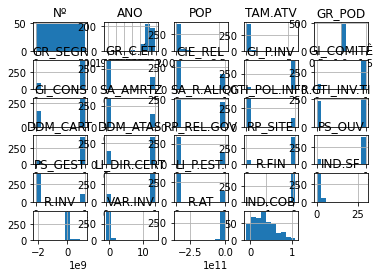

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#df = df[['TAMANHO DOS ATIVOS', 'UF','GR1','GR2', 'GR4', 'NAT. JURÍDICA', 'ANO DE CRIAÇÃO']]
# Univariate Histogram
df.hist()
plt.show()

In [6]:
df.groupby('RP_REG.ENV').size()

RP_REG.ENV
A    202
B    181
C     97
dtype: int64

In [7]:
df.groupby('UF').size()

UF
AC     2
AL     9
AM     5
AP     1
BA     8
CE    23
DF     1
ES    12
GO    21
MA     4
MG    55
MS    26
MT    17
PA    10
PB    12
PE    30
PI     5
PR    36
RJ    26
RN     6
RO    12
RR     1
RS    35
SC    35
SE     3
SP    85
TO     3
dtype: int64

In [8]:
from scipy import stats
import seaborn as sns
plt.hist(df['distance'].dropna().values)
sns.displot(y=np.log10(df['R.FIN']), x=np.log10(df['TAM.ATV']), height=8, kind="hist", legend=True, col=df['N.JUR'], aspect=1)#log_scale=True)#fit=stats.norm);

KeyError: 'distance'

In [ ]:
#sns.displot(np.log10(df['R.FIN']))
sns.jointplot(y=df['TAM.ATV'], x=df["R.FIN"], dropna=True)

In [ ]:
sns.regplot(x=np.log10(df['TAM.ATV']), y=np.log10(df["R.FIN"]), dropna=True)

In [ ]:
df.corr(method="spearman")

In [ ]:
sns.pairplot(df)

In [ ]:
sns.displot(df, x=np.log10(df['R.FIN']), hue='N.JUR', multiple='stack')#, stat='probability')

In [ ]:
# Density Plot Univariate 'Density'
df.plot(kind = 'density', 
          subplots = False,  
          layout = (1,1), 
          sharex = True)
plt.show()

In [ ]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[1:5])
plt.show()

In [ ]:
quali = ['UF','GR1','GR2', 'GR4', 'NAT. JURÍDICA']
df[list(quali)] = df[list(quali)].astype(str)
df['TAMANHO DOS ATIVOS'] = df['TAMANHO DOS ATIVOS'].astype(float)
df.dtypes

In [ ]:
# Box and Whisker Plots
df.plot(kind = 'box',
          subplots = True, 
          layout = (1,1),
          sharex = False, 
          sharey = False)
plt.show()

In [ ]:
sns.displot(df, x='TAMANHO DOS ATIVOS', kind='kde', hue='NAT. JURÍDICA',
            bw_adjust=9, multiple='stack', fill=True, cut=0)

In [ ]:
sns.displot(df, x='TAMANHO DOS ATIVOS', kind='ecdf', hue='NAT. JURÍDICA')

In [ ]:
sns.displot(df, y='TAMANHO DOS ATIVOS', x="NAT. JURÍDICA", cbar=True, log_scale=(False, False))#, kind='kde')

In [ ]:
sns.jointplot(data=df, x="ANO DE CRIAÇÃO", y="TAMANHO DOS ATIVOS", hue="GR4")#, kind='kde')

In [ ]:
df.groupby('GRUPO').size()

In [ ]:
df.groupby('ADESÃO AO PROGESTÃO').size()

In [ ]:
df.groupby('MATURIDADE').size()

In [ ]:
df.groupby('GR1').size()

In [ ]:
df.groupby('GR2').size()

In [ ]:
df.groupby('GR4').size()

In [ ]:
df['TAMANHO DOS ATIVOS'].describe()